# HW6-课后练习

<span style="color:red; font-weight:bold;">此次作业是课后练习，供大家熟练课堂上讲授的知识点，不计入任何分数。</span>

<span style="color:red; font-weight:bold;">请将作业命名为 HW6-课后练习+姓名+学号.ipynb, 例如 HW6-课后练习+张三+1000000000.ipynb</span>

## 请认真阅读代码，理解numpy相关基本操作

### 0.1

In [13]:
import numpy as np

a0 = np.array([[1,2,3],[4,5,6]])
b0 = np.array([[10],[20]])
print(a0+b0)
a1 = np.arange(30).reshape(2, 3, 5)
b1 = np.arange(3).reshape(3, 1)
print(a1+b1)
a2 = np.arange(48).reshape(8, 1, 6, 1)
b2 = np.arange(35).reshape(   7, 1, 5)
print((a2*b2).shape)

[[11 12 13]
 [24 25 26]]
[[[ 0  1  2  3  4]
  [ 6  7  8  9 10]
  [12 13 14 15 16]]

 [[15 16 17 18 19]
  [21 22 23 24 25]
  [27 28 29 30 31]]]
(8, 7, 6, 5)


### 0.2 Operation on a given axis

In [14]:
a0 = np.arange(6).reshape(2,3)
# [[0,1,2],
#  [3,4,5]]
print(np.mean(a0))
print(np.max(a0, axis=0))
print(np.argmax(a0, axis=0))
print(np.min(a0, axis=1))

2.5
[3 4 5]
[1 1 1]
[0 3]


### 0.3 Manipulating shape

In [15]:
a = np.arange(6)
print(a)
a.resize(3, 2)
## Notice the difference between reshape and resize!
# `resize` modifies the array in-place, and does not return values.
print(a)
a.reshape(2, 3) 
print(a)
# `reshape` only returns the reshaped result, and does not change the array.
print(a.shape)
a = a.reshape(2, 3)
print(a)
print(a.shape)
a = a.reshape(-1, 2) 
# `-1' means that the value is inferred from the length of the array and remaining dimensions.
print(a)
# [[0 1]
#  [2 3]
#  [4 5]]
a = a.T
print(a)
# [[0 2 4]
#  [1 3 5]]
print(a.ravel()) # default order: C (for C/C++ order)
# A flattened array, `order` can be specified.
print(a.ravel('F')) # Fortran-style order

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]
(3, 2)
[[0 1 2]
 [3 4 5]]
(2, 3)
[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]
[0 2 4 1 3 5]
[0 1 2 3 4 5]


### 0.4 numpy.dot
进一步探索细节请查阅[文档](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [16]:
import numpy as np

a0 = np.random.rand(30)
b0 = np.arange(30)/30
dot0 = np.dot(a0, b0)
print(a0.shape, b0.shape, dot0.shape, (a0@b0).shape, sep='\t\t')
# Equivalent to inner product for 1D array
assert(np.inner(a0, b0) == dot0)
a1 = a0.reshape(-1, 5)
b1 = b0.reshape(5, -1)
dot1 = np.dot(a1, b1)
assert((np.matmul(a1, b1) == dot1).all)
# Matrix multiplication, `np.matmul(a1, b1)` or `a1 @ b1` is preferred.
print(a1.shape, b1.shape, dot1.shape, (a1@b1).shape, sep='\t\t')
a2 = a1
b2 = b1[..., 0]
dot2 = np.dot(a2, b2)
print(a2.shape, b2.shape, dot2.shape, (a2@b2).shape, sep='\t\t')
a3 = a0.reshape(2, -1, 5)
b3 = b0.reshape(2, 5, -1)
dot3 = np.dot(a3, b3)
# This is a bit counter-intuitive, so use `np.dot` carefully. ^_^
print(a3.shape, b3.shape, dot3.shape, (a3@b3).shape, sep='\t')

(30,)		(30,)		()		()
(6, 5)		(5, 6)		(6, 6)		(6, 6)
(6, 5)		(5,)		(6,)		(6,)
(2, 3, 5)	(2, 5, 3)	(2, 3, 2, 3)	(2, 3, 3)


## 初步练习

### 计算$R=A+A$, $R=A^TA$, $R=AB$, $R=B-I$。

In [17]:
#TODO
A = np.arange(6)
A = A.reshape(3,2)
R = A+A
print(R)
At = A.T
R = np.dot(A,At)
print(R)
B = np.random.rand(9)
B = B.reshape(3,3)
print(np.dot(B,A))
identity_matrix = np.eye(3)
print(B)
print(B-identity_matrix)

[[ 0  2]
 [ 4  6]
 [ 8 10]]
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 41]]
[[3.44954658 4.42726202]
 [3.92940371 5.38311873]
 [3.29460911 5.0123095 ]]
[[0.04534573 0.13996612 0.79240359]
 [0.02980136 0.88312548 0.54078819]
 [0.44798018 0.89213587 0.37758434]]
[[-0.95465427  0.13996612  0.79240359]
 [ 0.02980136 -0.11687452  0.54078819]
 [ 0.44798018  0.89213587 -0.62241566]]


计算方程组的解。

$$
\left\{\begin{aligned}
2 x_{1}+x_{2}+x_{3} &=5 \\
3 x_{1}+2 x_{2}+ 2 x_{3} &=8 \\
x_{2}+2 x_{3} &=2
\end{aligned}\right.
$$

In [18]:
# TODO
A=np.array([[2,1,1],
   [3,2,2],
   [0,1,2]])
B=np.array([5,8,2])
print(np.linalg.solve(A,B))
A=np.linalg.inv(A)
print(np.dot(A,B))
print(np.dot(A,B).astype(int))

[ 2.00000000e+00 -1.33226763e-15  1.00000000e+00]
[ 2.00000000e+00 -1.77635684e-15  1.00000000e+00]
[2 0 1]


## 使用numpy实现K-means聚类

### 1.创建数据集
请使用numpy创建一个在[0,1)上的形状为(10,2)的矩阵

In [19]:
import numpy as np
np.random.seed(1)
def create_random_dataset(num_samples=10, dimensions=2):
    #TODO
    return np.random.rand(num_samples, dimensions)

dataset = create_random_dataset(10, 2)
dataset

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01],
       [2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01]])

### 2.绘制散点图
请使用matplotlib绘制这个数据集的散点图

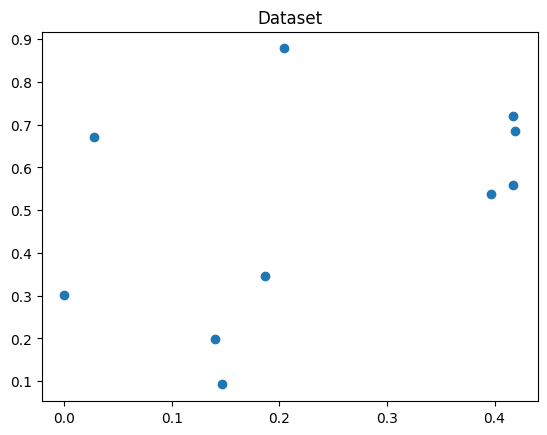

In [20]:
import matplotlib.pyplot as plt

def plot_dataset(dataset):
    #TODO
    plt.title('Dataset')
    plt.scatter(dataset[:,0], dataset[:,1])
    plt.show()
    

plot_dataset(dataset)


### 3.使用numpy计算两个点之间的L2距离

In [21]:
def euclidean_distance(point1, point2):
    #TODO
    return np.sqrt(np.sum((point1 - point2)**2))

distance = euclidean_distance(dataset[0], dataset[1])
distance

0.5903636317721634

### 4. 初始化质心
在dataset数据集上随机选择k个点作为质心

In [22]:
def initialize_centroids(dataset, k):
    #TODO
    return dataset[np.random.choice(dataset.shape[0], k, replace=False)]
centroids = initialize_centroids(dataset, 3)
centroids

array([[0.14675589, 0.09233859],
       [0.39676747, 0.53881673],
       [0.18626021, 0.34556073]])

### 5. 聚类分配
对于数据集上每一个点，计算其与每个质心的距离，并选择最近的质心作为属于该质心的类。输出是一个一维向量clusters，clusters[i]代表数据集中第i个向量属于质心向量中的第几个质心

In [23]:
def assign_clusters(dataset, centroids):
    #TODO
    clusters = np.zeros(dataset.shape[0])
    for i in range(dataset.shape[0]):
        distances = np.sqrt(np.sum((dataset[i] - centroids)**2, axis=1))
        clusters[i] = np.argmin(distances)
    return clusters

clusters = assign_clusters(dataset, centroids)
clusters

array([1., 2., 0., 2., 1., 1., 1., 2., 1., 0.])

### 6. 更新质心
新的质心等于当前属于该质心的点集的质心。

In [24]:
def update_centroids(dataset, clusters, k):
    #TODO
    new_centroids = np.zeros((k, dataset.shape[1]))
    for i in range(k):
        new_centroids[i] = np.mean(dataset[clusters == i], axis=0)
    return new_centroids

new_centroids = update_centroids(dataset, clusters, 3)
new_centroids

array([[0.14357141, 0.14522004],
       [0.37094821, 0.6762336 ],
       [0.07125406, 0.4394536 ]])

### 7. 迭代和收敛
综合以上步骤，不断迭代直到质心收敛，实现最终的kmeans算法。

In [25]:
def kmeans(dataset, k, max_iters=100):
    #TODO
    centroids = initialize_centroids(dataset, k)
    for i in range(max_iters):
        clusters = assign_clusters(dataset, centroids)
        new_centroids = update_centroids(dataset, clusters, k)
        if (new_centroids == centroids).all():
            break
        centroids = new_centroids
    return clusters, centroids

# 示例调用
clusters, centroids = kmeans(dataset, 3)
clusters, centroids

(array([0., 1., 1., 1., 0., 0., 0., 2., 0., 1.]),
 array([[0.37094821, 0.6762336 ],
        [0.11837935, 0.23458335],
        [0.02738759, 0.67046751]]))

### 8. 可视化最终结果
使用plt.scatter函数画出数据集的散点图，不同的类用不同的颜色表示，质心用特殊符号'X'表示。

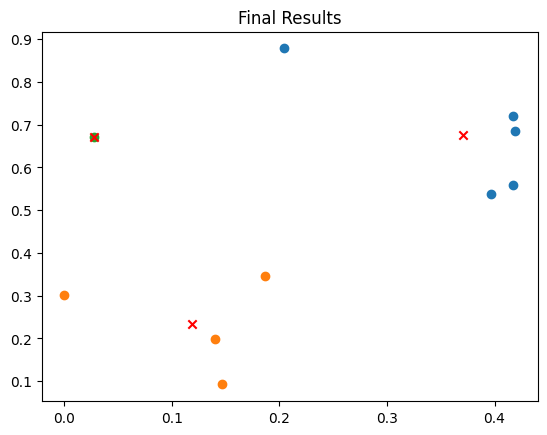

In [26]:
def plot_final_results(dataset, clusters, centroids):
    #TODO
    plt.title('Final Results')
    for i in range(centroids.shape[0]):
        plt.scatter(dataset[clusters == i][:,0], dataset[clusters == i][:,1])
    plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='x')
    plt.show()
    

plot_final_results(dataset, clusters, centroids)


### 9.向量化加速K-means算法
下面给出了一种较为低效的逐元素K-means算法，你需要将这个K-means算法向量化，充分利用numpy的特性，然后比较两种算法的运行时间。

#### 逐元素版本

2024-03-16 10:51:28  iter: 10
2024-03-16 10:51:29  iter: 20
2024-03-16 10:51:29  iter: 30
2024-03-16 10:51:30  iter: 40
2024-03-16 10:51:30  iter: 50
2024-03-16 10:51:31  iter: 60
2024-03-16 10:51:32  iter: 70
2024-03-16 10:51:32  iter: 80
2024-03-16 10:51:33  iter: 90
2024-03-16 10:51:34  iter: 100
总用时: 6.47519063949585 秒


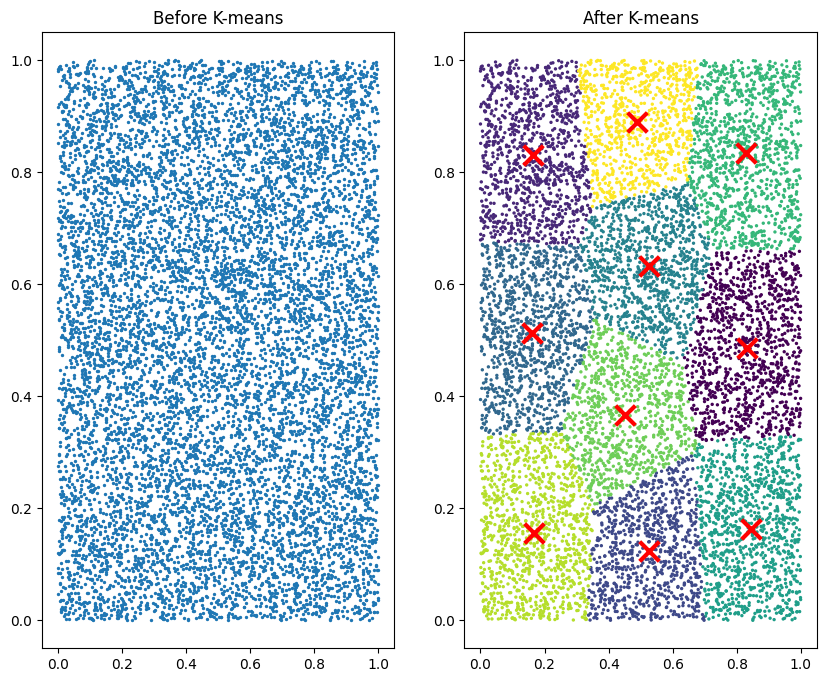

In [27]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 循环实现版本
def k_means_loop(X, K, max_iters=100):
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    
    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)
        # assign each data point to its nearest centroid
        clusters = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum(np.square(X[i, :] - centroids), axis=1))
            clusters[i] = np.argmin(distances)
        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)
    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_loop(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()

#### 向量化版本

2024-03-16 10:51:34  iter: 10
2024-03-16 10:51:34  iter: 20
2024-03-16 10:51:34  iter: 30
2024-03-16 10:51:34  iter: 40
2024-03-16 10:51:34  iter: 50
2024-03-16 10:51:34  iter: 60
2024-03-16 10:51:34  iter: 70
2024-03-16 10:51:34  iter: 80
2024-03-16 10:51:34  iter: 90
2024-03-16 10:51:34  iter: 100
总用时: 0.0010001659393310547 秒


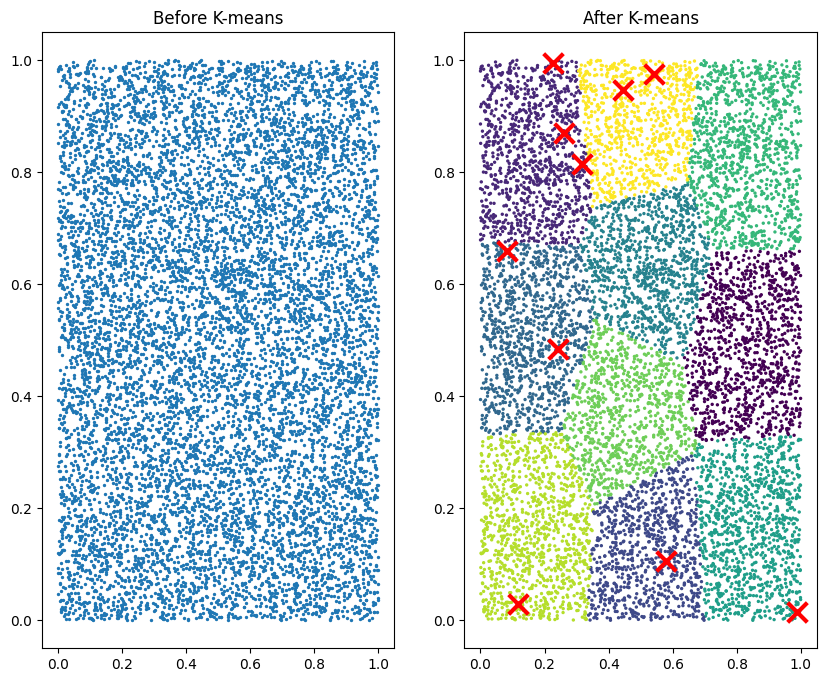

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt


def get_time():
    return time.strftime('%Y-%m-%d %H:%M:%S ',time.localtime())


np.random.seed(123)  # 设置随机种子，保证每次运行结果一致

# 生成数据
X = np.random.rand(10000, 2)


# 向量化实现版本
def k_means_vectorized(X, K, max_iters=100):
    
    # randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    for iter in range(max_iters):
        if (iter+1) % 10 == 0:
            print(get_time(), "iter:", iter+1)

        #TODO
        #TODO
        #TODO
    
    return clusters, centroids


t0 = time.time()  # 记录开始时间
clusters, centroids = k_means_vectorized(X, K=10)  # 调用函数
t1 = time.time()  # 记录结束时间
print(f"总用时: {t1 - t0} 秒")


# plot data before K-means clustering
plt.rcParams['figure.figsize'] = (10, 8)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.title('Before K-means')

# plot data after K-means clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('After K-means')

# show the plot
plt.show()

## K-means++算法
K-means++是K-means聚类算法的一个改进版，主要优化了质心的初始化过程。在标准K-means算法中，初始质心是随机选择的，这可能导致算法的结果对初始化过程非常敏感，有时甚至会导致较差的聚类效果。相比之下，K-means++通过一种更精心设计的方式来选择初始质心，目的是为了提高聚类结果的质量和稳定性。

K-means++的初始化过程遵循以下步骤：

1. **选择第一个质心**：从数据集中随机选择一个样本作为第一个质心。

2. **计算距离**：对于数据集中的每一个样本，计算其与已选择质心的距离的和。

3. **选择下一个质心**：选择下一个质心的***概率***与其到最近质心距离的平方成正比。也即离当前质心集合较远的点有更高的***概率***被选为下一个质心。

4. **重复步骤2和3**：重复上述过程直到选出所有K个质心。

5. **进入标准的K-means聚类过程**：一旦所有质心被初始化，算法就会进入标准的K-means算法过程。


In [29]:
def initialize_kmeans_plus_plus(X, K):
    #TODO
    centroids = np.zeros((K, X.shape[1]))
    centroids[0] = X[np.random.choice(X.shape[0])]
    for i in range(1, K):
        distances = np.zeros(X.shape[0])
        for j in range(X.shape[0]):
            distances[j] = np.min(np.sqrt(np.sum((X[j] - centroids[:i])**2, axis=1)))
        prob = distances / np.sum(distances)
        centroids[i] = X[np.random.choice(X.shape[0], p=prob)]
    return centroids


In [30]:
def k_means_loop(X, K,initialize, max_iters=100):
    np.random.seed(123)
    if initialize == 'kmeans++':
        centroids = initialize_kmeans_plus_plus(X, K)
    else:
        centroids = X[np.random.choice(X.shape[0], K, replace=False), :]
    
    prev_clusters = np.zeros(X.shape[0], dtype=int)
    for iter in range(max_iters):
        print(get_time(), "iter:", iter+1)
        # assign each data point to its nearest centroid
        clusters = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum(np.square(X[i, :] - centroids), axis=1))
            clusters[i] = np.argmin(distances)
        if all(prev_clusters == clusters):
            break
        prev_clusters = clusters
        # recompute centroids as the mean of the data points in each cluster
        for k in range(K):
            centroids[k, :] = np.mean(X[clusters == k, :], axis=0)
    return clusters, centroids

In [31]:
%pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 262.6 kB/s eta 0:00:41
   ---------------------------------------- 0.0/10.6 MB 245.8 kB/s eta 0:00:43
   ---------------------------------------- 0.0/10.6 MB 245.8 kB/s eta 0:00:43
   ---------------------------------------- 0.1/10.6 MB 273.8 kB/s eta 0:00:39
   ---------------------------------------- 0.1/10.6 MB 375.8 kB/s eta 0:00:28
   ---------------------------------------- 0.1/10.6 MB 450.6 kB/s eta 0:00:24
    --------------------------------------- 0.2/10.6 MB 482.7 kB/s eta 0:00:22
    --------------------------------------- 0.2/10.6 MB 567.2 kB/s eta 0:00:19
   - -------------------------------------- 0.3/10.6 MB 710.0 kB/s eta 0:00:15
   - -------------------------------------- 0.4/10.6 MB 849.3 kB/s eta 0:00:13


#### 关注迭代次数与运行时间

In [32]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=3000, centers=10, cluster_std=0.60, random_state=0)
start = time.time()
clusters_kmeans, centroids_kmeans = k_means_loop(X, K=10, initialize='random')
end = time.time()
print(f"K-means运行时间: {end - start}秒")

start = time.time()
clusters_kmeans_pp, centroids_kmeans_pp = k_means_loop(X, K=10, initialize='kmeans++')
end = time.time()
print(f"K-means++运行时间: {end - start}秒")


2024-03-16 10:51:47  iter: 1
2024-03-16 10:51:47  iter: 2
2024-03-16 10:51:47  iter: 3
2024-03-16 10:51:47  iter: 4
2024-03-16 10:51:47  iter: 5
2024-03-16 10:51:47  iter: 6
2024-03-16 10:51:47  iter: 7
2024-03-16 10:51:47  iter: 8
2024-03-16 10:51:47  iter: 9
2024-03-16 10:51:47  iter: 10
2024-03-16 10:51:47  iter: 11
2024-03-16 10:51:47  iter: 12
2024-03-16 10:51:47  iter: 13
2024-03-16 10:51:47  iter: 14
2024-03-16 10:51:47  iter: 15
2024-03-16 10:51:47  iter: 16
2024-03-16 10:51:47  iter: 17
2024-03-16 10:51:47  iter: 18
2024-03-16 10:51:47  iter: 19
2024-03-16 10:51:47  iter: 20
2024-03-16 10:51:47  iter: 21
2024-03-16 10:51:47  iter: 22
2024-03-16 10:51:47  iter: 23
2024-03-16 10:51:47  iter: 24
2024-03-16 10:51:47  iter: 25
2024-03-16 10:51:47  iter: 26
2024-03-16 10:51:47  iter: 27
2024-03-16 10:51:47  iter: 28
K-means运行时间: 0.5496246814727783秒
2024-03-16 10:51:48  iter: 1
2024-03-16 10:51:48  iter: 2
2024-03-16 10:51:48  iter: 3
2024-03-16 10:51:48  iter: 4
2024-03-16 10:51:48 

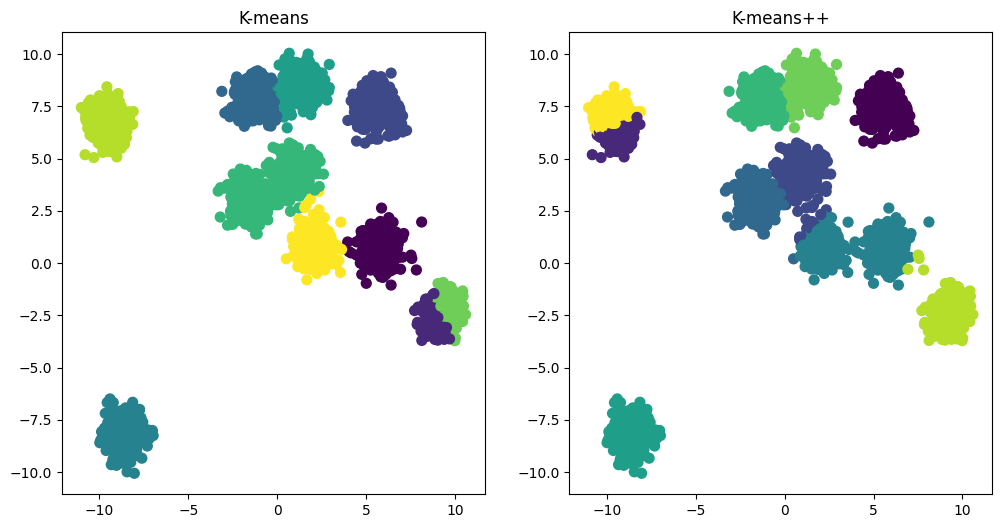

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, s=50, cmap='viridis')
plt.title("K-means")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans_pp, s=50, cmap='viridis')
plt.title("K-means++")

plt.show()
